Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [53]:
from itertools import accumulate
import numpy as np
from matplotlib import pyplot as plt



from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [54]:
UNIVERSE_SIZE = 1000
NUM_SETS = 200
DENSITY = 0.1

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [55]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [77]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    phenotype = np.logical_or.reduce(SETS[solution])
    return np.all(phenotype)


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [57]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
ic(valid(solution), cost(solution))
None

ic| valid(solution): np.True_
    cost(solution): np.float64(31685.6202891617)


In [58]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < 0.5
ic(valid(solution), cost(solution))
None

ic| valid(solution): np.True_
    cost(solution): np.float64(17236.56013686126)


# Simple RHMC

In [72]:
def single_mutation(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    i = rng.integers(0, NUM_SETS)
    new_sol[i] = not new_sol[i]
    return new_sol


def multiple_mutation(solution: np.ndarray) -> np.ndarray:
    mask = rng.random(NUM_SETS) < 0.01
    new_sol = np.logical_xor(solution, mask)
    return new_sol

In [73]:
def fitness(solution: np.ndarray):
    return (valid(solution), -cost(solution))

ic| fitness(solution): (np.False_, np.float64(-9029.857464815945))
ic| fitness(solution): (np.True_, np.float64(-5450.941897963428))


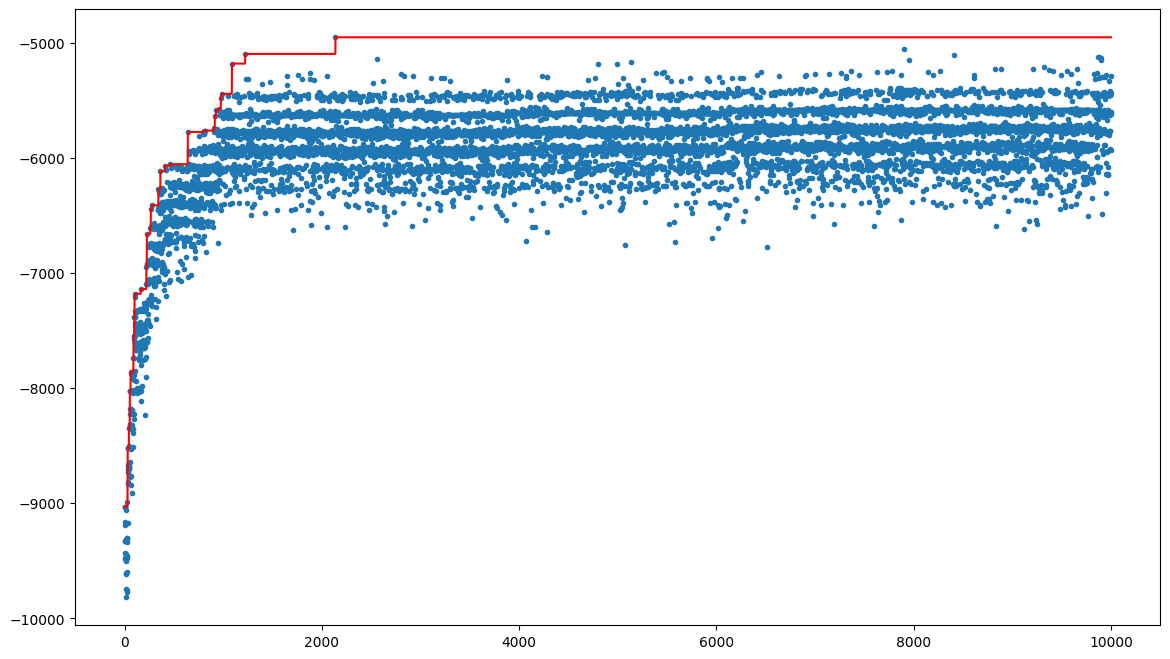

In [76]:
solution = rng.random(NUM_SETS) < .3
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(fitness(solution))

tweak = multiple_mutation

for steps in range(10_000):
    new_solution = tweak(solution)
    f = fitness(new_solution)
    history.append(float(f[1]))

    if f > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)
        # ic(fitness(solution))

# ic(solution)
ic(fitness(solution))
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")